In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.11.0


In [3]:
X=tf.constant(np.array([2,4,6,8,10,12,14,16]),dtype=tf.float32)
X

<tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 2.,  4.,  6.,  8., 10., 12., 14., 16.], dtype=float32)>

In [5]:
X=tf.range(0,100,2)
X 

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
       68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98])>

In [6]:
Y=X+15

In [ ]:
tf.random.set_seed(42)

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(60,activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

model.fit(tf.expand_dims(X,axis=-1),Y,epochs=100)



In [7]:
x_train=X[:40]
y_train=Y[:40]

x_test=X[40:]
y_test=Y[40:]

In [ ]:
plt.scatter(x_train,y_train,c="blue",label="training")
plt.scatter(x_test,y_test,c="g",label="testing")
plt.legend()

In [ ]:
model.summary()

In [52]:
model_new=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1)
])

model_new.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

model_new.fit(tf.expand_dims(x_train,axis=-1),y_train,epochs=100)



Epoch 1/100
2/2 [==============================] - 1s 4ms/step - loss: 53.4074 - mae: 53.4074
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 46.4902 - mae: 46.4902
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 42.1960 - mae: 42.1960
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 36.7134 - mae: 36.7134
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 31.1406 - mae: 31.1406
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 24.1286 - mae: 24.1286
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 16.4876 - mae: 16.4876
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 7.7996 - mae: 7.7996
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 8.5325 - mae: 8.5325
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 12.4625 - mae: 12.4625
Epoch 11/100
2/2 [==============================] - 0s 7ms/step

In [22]:
y_preds=model_new.predict(x_test)

1/1 [==============================] - 0s 58ms/step


In [53]:
model_new.evaluate(x_test,y_test)

1/1 [==============================] - 0s 112ms/step - loss: 0.6300 - mae: 0.6300


[0.6300300359725952, 0.6300300359725952]

1/1 [==============================] - 0s 40ms/step - loss: 0.6300 - mae: 0.6300


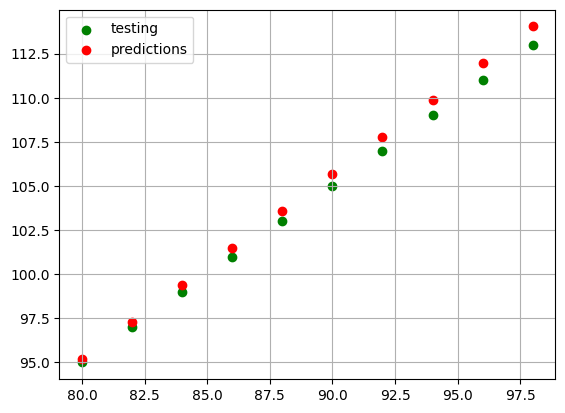

In [54]:
y_preds=model_new.predict(x_test)
model_new.evaluate(x_test,y_test)
plt.scatter(x_test,y_test,c="g",label="testing")
plt.scatter(x_test,y_preds,c="red",label="predictions")
plt.grid()
plt.legend()

In [16]:
model_new.save("the_new_model.h5")

In [2]:
model_already=tf.keras.models.load_model("the_new_model.h5")

In [10]:
model_already.evaluate(x_test,y_test)[0]

1/1 [==============================] - 0s 26ms/step - loss: 0.1222 - mae: 0.1222


0.12219543755054474

In [62]:
model_already.predict([100])

1/1 [==============================] - 0s 52ms/step


array([[114.88593]], dtype=float32)